In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
from radiomics.featureextractor import *
from sklearn import mixture

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
from library_dicom.post_processing.GaussianModel import GaussianModel

In [2]:
import SimpleITK as sitk  
mask_path = r'C:\Users\wendy\Documents\STAGE\1.2.124.113532.172.16.25.2.20130717.529.1327224_nifti_mask.nii'
pet_path = r'C:\Users\wendy\Documents\STAGE\1.2.124.113532.172.16.25.2.20130717.529.1327224_nifti_PT.nii'

In [3]:
model = GaussianModel(mask_path, pet_path, type = '4d')

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [4]:
parameters = model.gaussien_mixture_model()

In [5]:
parameters[1]

{'best_n_components': 4,
 'best_cv_type': 'full',
 'label': array([3, 3, 3, ..., 0, 0, 0], dtype=int64)}

In [6]:
for i in range(1,11):
    print('key : {}, volume : {}'.format(i, model.features[i]['volume']))

key : 1, volume : 165.504
key : 2, volume : 6.4
key : 3, volume : 21.632
key : 4, volume : 318.336
key : 5, volume : 15.36
key : 6, volume : 22.464000000000002
key : 7, volume : 13.824
key : 8, volume : 785.28
key : 9, volume : 5.824
key : 10, volume : 6.72


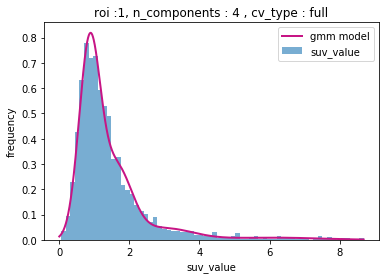

In [7]:
model.get_histogram_best_model(1)

In [8]:
for i in range(1,11):
    print('key : {}, n _components : {}'.format(i, parameters[i]['best_n_components']))

key : 1, n _components : 4
key : 2, n _components : 1
key : 3, n _components : 1
key : 4, n _components : 5
key : 5, n _components : 1
key : 6, n _components : 1
key : 7, n _components : 1
key : 8, n _components : 6
key : 9, n _components : 1
key : 10, n _components : 1


In [7]:
model.number_of_roi_after_model()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [8]:
cluster = model.new_clusters()

In [9]:
mask = model.new_labelled_mask()

In [10]:
mask.shape

(169, 169, 255)

for i in range(1,22) : 
    x,y,z = np.where(mask == i)
    new_mask_3D = np.zeros((169, 169, 255))
    for j in range(len(x)): 

        new_mask_3D[x[j], y[j], z[j]] = 10
    mip_imshow(new_mask_3D, 0)

In [4]:
import SimpleITK as sitk 

In [ ]:
#2 MOYENS POUR LABELLISE MASK BINAIRE

In [ ]:
#SCIKIT LEARN LABEL

In [21]:
model.number_of_label

10

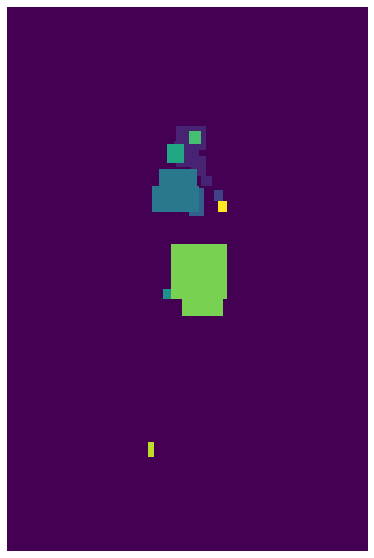

In [17]:
mip_imshow(model.labelled_mask, 0, 'viridis')

In [ ]:
#SIMPLE ITK CONNECTED COMPONENT

In [4]:
labelled = sitk.ConnectedComponent(model.binary_mask_img)

In [28]:
stats = sitk.LabelIntensityStatisticsImageFilter()
stats.Execute(labelled, model.pet_img)

In [29]:
stats.GetLabels()

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)

In [38]:
for label in stats.GetLabels() : 
    print('label : {}, number_pixels : {}, centroid : {}'.format(label, stats.GetNumberOfPixels(label), stats.GetCentroid(label)))

label : 1, number_pixels : 91, centroid : (69.77794471153845, 1.6240985576923208, 915.300048828125)
label : 2, number_pixels : 12270, centroid : (114.45707454665853, 94.98942988488182, 1240.5215647205455)
label : 3, number_pixels : 235, centroid : (23.65683178191489, 35.27385305851061, 1207.300048828125)
label : 4, number_pixels : 5, centroid : (47.31640625, 49.31640625, 1207.300048828125)
label : 5, number_pixels : 338, centroid : (-41.914362980769226, 82.2394831730769, 1379.300048828125)
label : 6, number_pixels : 4974, centroid : (31.032530093988726, 43.438641875251335, 1397.9860158566735)
label : 7, number_pixels : 105, centroid : (77.03069196428572, 133.1259300595238, 1371.300048828125)
label : 8, number_pixels : 100, centroid : (-70.48359375000001, 127.11640625000001, 1391.300048828125)
label : 9, number_pixels : 2586, centroid : (-56.694421282869314, 71.81911313321734, 1478.7664061367095)
label : 10, number_pixels : 351, centroid : (13.88050881410254, 47.983072916666686, 1471.30

In [42]:
sitk.Image.TransformPhysicalPointToIndex(labelled, stats.GetCentroid(1 ))

(102, 67, 47)

In [5]:
array_1 = sitk.GetArrayFromImage(labelled).transpose()

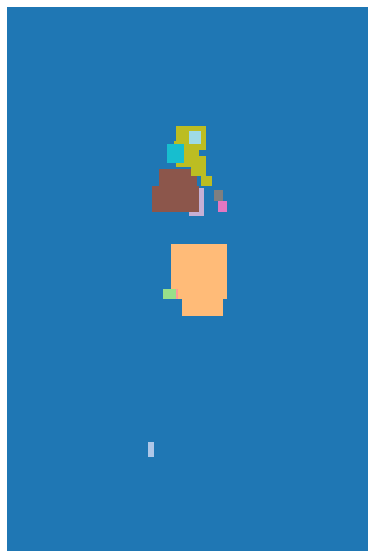

In [32]:
mip_imshow(array_1, 0, cmap = 'tab20')

In [35]:
model.number_of_label

10

In [ ]:
#MASK 4D IMSHOW ET MASK BINAIRE 3D IMSHOW 

In [4]:
mask = sitk.ReadImage(mask_path)
mask_array = sitk.GetArrayFromImage(mask).transpose()
mask_array.shape

(169, 169, 255, 18)

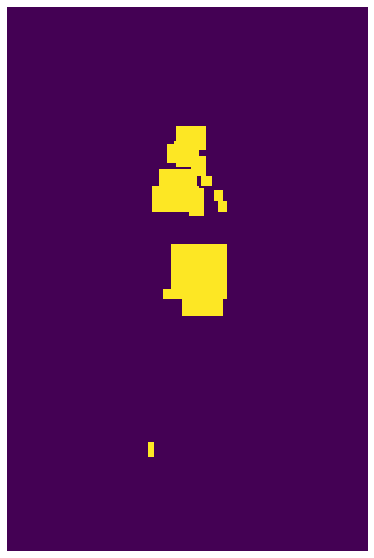

In [20]:
mip_imshow_4D(mask_array, 0, cmap = 'viridis')

In [4]:
mask_binaire = model.binary_mask

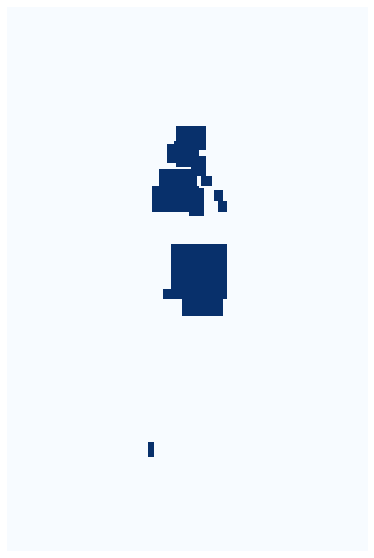

In [6]:
mip_imshow(mask_binaire, 0, cmap = 'Blues')

In [7]:
create_mip_gif(mask_binaire, r'C:\Users\wendy\Documents\STAGE\post_processing\mip_binary_mask', 'mask_binaire', 'Blues', 1)

In [7]:
pet = sitk.ReadImage(pet_path)
pet_array = sitk.GetArrayFromImage(pet).transpose()
pet_array.shape

(169, 169, 255)

In [ ]:
#superposer TEP et MIP 

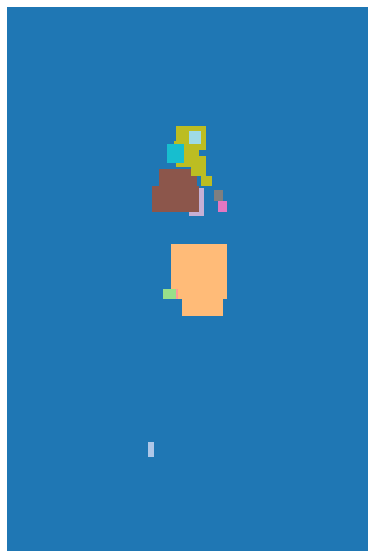

In [31]:
mip_imshow(array_1, 0 , cmap ='tab20')

In [30]:
blended_directory = r'C:\Users\wendy\Documents\STAGE\post_processing\mip_label'


create_mip_blend_gif(labelled_mask, pet_array, blended_directory, 'test', cmap_mask = 'tab20', alpha = 0.7)

In [ ]:
#WATERSHED

In [20]:
ws = sitk.MorphologicalWatershedFromMarkers(model.pet_img, model.labelled_mask_img, markWatershedLine=True, fullyConnected= False)

In [21]:
array = sitk.GetArrayFromImage(ws).transpose()

In [22]:
array.shape

(169, 169, 255)

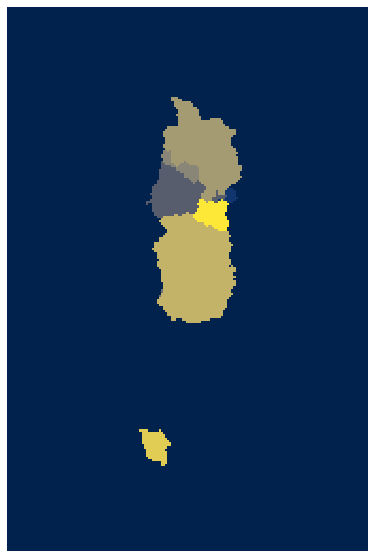

In [23]:
mip_imshow(array, 0)

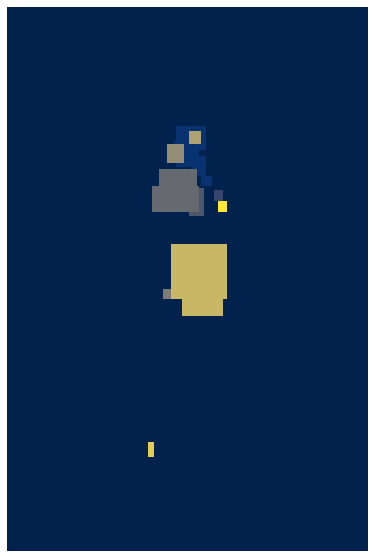

In [41]:
mip_imshow(model.labelled_mask, 0)